### Pipeline gerarchica

**PIPELINE - APPROCCIO GERARCHICO**

Versione inizialmente semplice che si estende con la posibilità cambiare parametri aggiuntivi mantenendo le funzionalità di base

Contributo algoritmico per semplificare il grafo trovando strutture ripetitive-ricorsive al suo interno.

**PROCEDURA**

```
Identificare sottografo SG (figure come la prima iterazione di un frattale)
Collassare il SG in un solo nodo
Aggiornare il peso degli archi
Riapplicare il procedimento al grafo risultante (nuovo livello)
```

- Il pattern d'inizio `SG` sì puo anche lasciare libero, non c'è bisogno di fissarlo (stelle, triangoli, etc.)
- Identificare un'istanza alla volta nel grafo di partenza, operazione greedy
- Potrebbero esserci più match (2 triangoli con un vertice in comune). Prendere decisioni arbitriarie
- Archi di **pesi** diversi potrebbero non matchare
- **Livelli**, ricordare quando il nodo è stato generato e quando si fa il match andare a vedere di generazione. Eventualmente imponendo che i nodi siano allo stesso livello (struttura frattale)
- Tenere traccia del tipo di nodi:

    **nodi pieni** → da espandere per avere gli ammassamenti. Espandendo i nodi pieni si ottiene la struttura frattale pulita oppure un'approssimazione di strutture che per quel pattern in input danno qualcosa che genera una struttura pseudo-ricorsiva

    **nodi vuoti** che si possono eliminare - pruning

In [1]:
import networkx as nx
import itertools

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

In [3]:
# grafo test

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])

livello 1

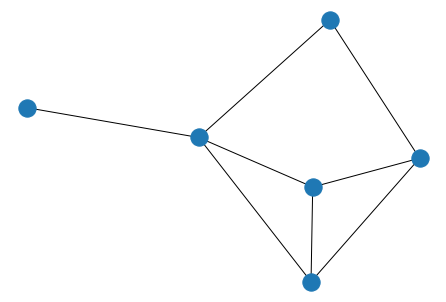

In [8]:
nx.draw(G)

In [4]:
# liste d'adiacenza

for nbr, datadict in G.adj.items():
    print(nbr, datadict)

1 {2: {}}
2 {1: {}, 3: {}, 4: {}, 5: {}}
3 {2: {}, 6: {}}
4 {2: {}, 5: {}, 6: {}}
5 {2: {}, 4: {}, 6: {}}
6 {3: {}, 4: {}, 5: {}}


#### Identificare sottografo SG, triangolo

In [5]:
nx.triangles(G)

{1: 0, 2: 1, 3: 0, 4: 2, 5: 2, 6: 1}

In [6]:
number_of_triangles = sum(nx.triangles(G).values()) / 3
number_of_triangles

2.0

#### 2 varianti della funzione identifica, funzionano solo con i triangoli al momento

In [7]:
def identify(G):
    tri = filter(lambda x: len(x) == 3, nx.enumerate_all_cliques(G))
    tri_subraphs = [G.subgraph(nodes) for nodes in tri]
    lis = []
    for graph in tri_subraphs:
        lis.append(list(graph.nodes()))
    return lis


identify(G)

[[2, 4, 5], [4, 5, 6]]

In [8]:
def identifica(G):
    cliques = nx.find_cliques(G)
    cliques_g = list(sum([list(itertools.combinations(set(clq), 3))
                          for clq in cliques if len(clq) >= 3], []))
    return cliques_g


identifica(G)

[(2, 4, 5), (4, 5, 6)]

#### Collassare il SG in un solo nodo

In [10]:
def contract(G):
    ris = identify(G)
    a, b, c = ris[0][0], ris[0][1], ris[0][2]
    M = nx.contracted_nodes(G, a, b)
    MM = nx.contracted_nodes(M, a, c)
    print(MM.nodes())
    nx.draw(MM)
    return MM

livello 2

[1, 2, 3, 6]


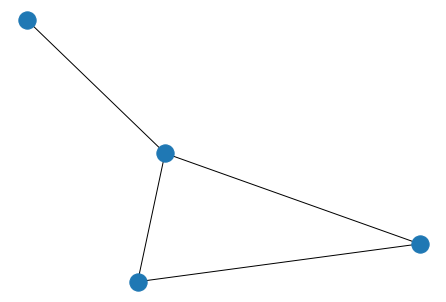

In [11]:
G1 = contract(G)

livello 3

[1, 2]


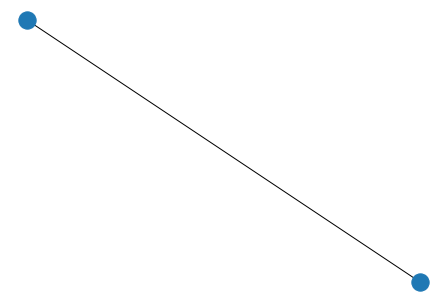

In [12]:
G2 = contract(G1)